In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from mizani.formatters import percent_format


ModuleNotFoundError: No module named 'plotnine'

In [23]:
pip install plotnine


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 656.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.4 kB ? eta -:--:--
   ---------------------------------------- 127.4/127.4 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from mizani.formatters import percent_format

In [29]:
# Load the dataset
bechdel_detailed_df = pd.read_csv('"C:\Users\madhu\bechdel analysis"', index_col=0)

# Rename column for clarity
bechdel_detailed_df.rename(columns={'rating': 'bt_score'}, inplace=True)

# Drop rows with missing values and duplicates
bechdel_detailed_df = bechdel_detailed_df.dropna().reset_index(drop=True)
bechdel_detailed_df.drop_duplicates(inplace=True)
bechdel_detailed_df = bechdel_detailed_df.reset_index(drop=True)

# Display dataset info
bechdel_detailed_df.info()
bechdel_detailed_df.describe().T


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 3-4: truncated \UXXXXXXXX escape (3195776398.py, line 2)

In [47]:
# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Rename column for clarity
bechdel_detailed_df.rename(columns={'rating': 'bt_score'}, inplace=True)

# Drop rows with missing values and duplicates
bechdel_detailed_df = bechdel_detailed_df.dropna().reset_index(drop=True)
bechdel_detailed_df.drop_duplicates(inplace=True)
bechdel_detailed_df = bechdel_detailed_df.reset_index(drop=True)

# Display dataset info
bechdel_detailed_df.info()
bechdel_detailed_df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4179 non-null   object 
 1   year         4179 non-null   float64
 2   bt_score     4179 non-null   float64
 3   dubious      4179 non-null   float64
 4   imdbid       4179 non-null   float64
 5   id           4179 non-null   float64
 6   submitterid  4179 non-null   float64
 7   date         4179 non-null   object 
 8   visible      4179 non-null   float64
dtypes: float64(7), object(2)
memory usage: 294.0+ KB


,count,mean,std,min,25%,50%,75%,max
year,4179.0,2.015471e+03,3.799965e+00,2009.0,2012.0,2015.0,2018.0,2.024000e+03
bt_score,4179.0,2.294807e+00,1.025150e+00,0.0,1.0,3.0,3.0,3.000000e+00
dubious,4179.0,9.978464e-02,2.997485e-01,0.0,0.0,0.0,0.0,1.000000e+00
imdbid,4179.0,6.019648e+06,9.485382e+07,102411.0,1707388.5,2808680.0,5903300.0,6.129999e+09
id,4179.0,6.998820e+03,2.709456e+03,694.0,4957.5,7204.0,9140.5,1.142800e+04
submitterid,4179.0,1.334975e+04,5.687760e+03,455.0,8988.5,14112.0,18023.0,2.211800e+04
visible,4179.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00


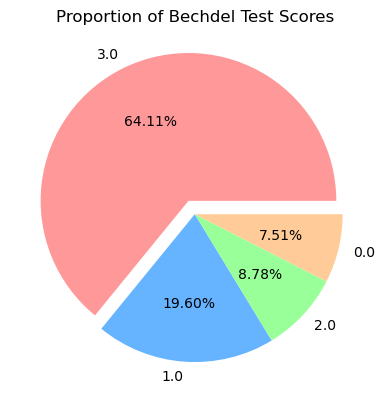

In [49]:
# Plot distribution of Bechdel scores using Plotnine
(ggplot(bechdel_detailed_df, aes(x='bt_score')) + 
    geom_bar(fill='lightcoral') + 
    geom_text(
        aes(label=after_stat('count')),
        stat='count',
        nudge_y=0.125,
        va='bottom'
    ) +
    labs(
        title='Distribution of Bechdel Test Scores',
        x='Bechdel Test Score',
        y='Frequency'
    ) +
    theme_minimal()
)

# Pie chart for Bechdel scores proportions
score_count_series = bechdel_detailed_df['bt_score'].value_counts()
gap = [0.1, 0, 0, 0]
plt.pie(np.array(score_count_series), labels=score_count_series.index, explode=gap, autopct='%.2f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Bechdel Test Scores')
plt.show()


In [51]:
dubious_count = bechdel_detailed_df['dubious'].value_counts()
print('Percentage of dubious movie scores:', f"{dubious_count[1.0] / (dubious_count[1.0] + dubious_count[0.0]) * 100:.2f}%")

dubious_movies = bechdel_detailed_df[bechdel_detailed_df['dubious'] == 1]
print('Proportion of dubious movies with score 0:', f"{sum(dubious_movies['bt_score'] == 0.0) / len(dubious_movies) * 100:.2f}%")
print('Proportion of dubious movies with score 1:', f"{sum(dubious_movies['bt_score'] == 1.0) / len(dubious_movies) * 100:.2f}%")
print('Proportion of dubious movies with score 2:', f"{sum(dubious_movies['bt_score'] == 2.0) / len(dubious_movies) * 100:.2f}%")
print('Proportion of dubious movies with score 3:', f"{sum(dubious_movies['bt_score'] == 3.0) / len(dubious_movies) * 100:.2f}%")

# Categorize movies based on Bechdel scores and dubiousness
bechdel_detailed_df['category'] = bechdel_detailed_df.apply(
    lambda row: 'Dubious' if row['dubious'] == 1 else 
                '0-Fewer than two female characters' if row['bt_score'] == 0 else 
                '1-Female characters do not talk' if row['bt_score'] == 1 else 
                '2-Female characters talk about men' if row['bt_score'] == 2 else 
                '3-Passes Bechdel Test', axis=1
)


Percentage of dubious movie scores: 9.98%
Proportion of dubious movies with score 0: 2.16%
Proportion of dubious movies with score 1: 8.87%
Proportion of dubious movies with score 2: 12.23%
Proportion of dubious movies with score 3: 76.74%


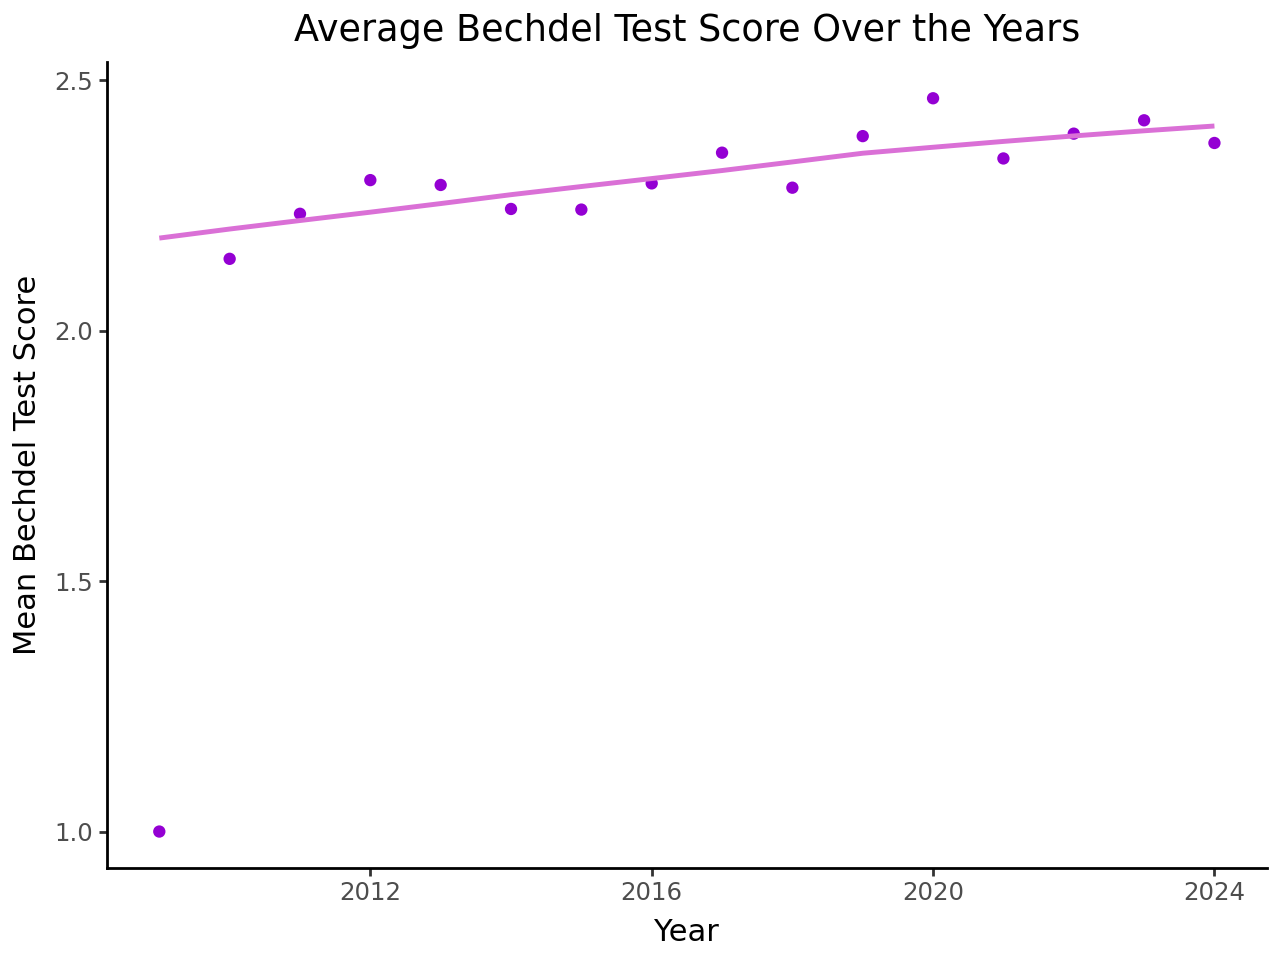

In [53]:
bechdel_year_mean = bechdel_detailed_df.groupby('year')['bt_score'].mean().to_frame().reset_index()

# Mean Bechdel Test Score over the years using Plotnine
(ggplot(bechdel_year_mean, aes(x='year', y='bt_score')) + 
    geom_point(color='darkviolet') + 
    geom_smooth(method='lowess', color='orchid', se=False) + 
    labs(
        title='Average Bechdel Test Score Over the Years',
        x='Year', 
        y='Mean Bechdel Test Score'
    ) +
    theme_classic()
)


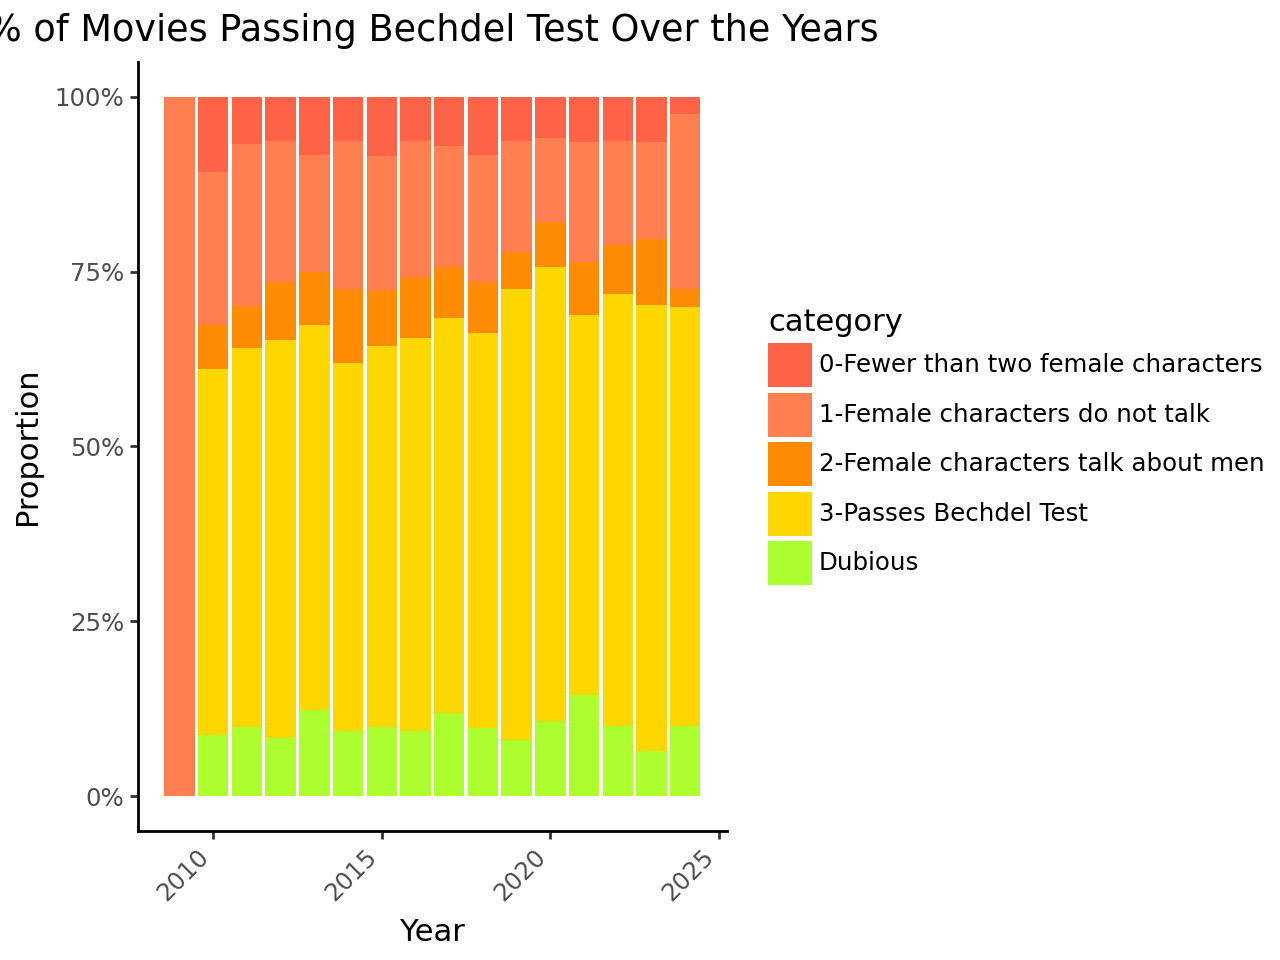

In [59]:
# Calculate proportions
bechdel_year_proportion = bechdel_detailed_df.groupby(['year', 'category']).size().reset_index(name='count')
bechdel_year_total = bechdel_year_proportion.groupby('year')['count'].transform('sum')
bechdel_year_proportion['proportion'] = bechdel_year_proportion['count'] / bechdel_year_total

# Stacked percentage bar chart using Plotnine
(ggplot(bechdel_year_proportion, aes(x='year', y='proportion', fill='category')) + 
    geom_bar(stat='identity', position='stack') + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values=['#FF6347', '#FF7F50', '#FF8C00', '#FFD700', '#ADFF2F']) +
    labs(
        title='% of Movies Passing Bechdel Test Over the Years',
        x='Year',
        y='Proportion'
    ) + 
    theme_classic() + 
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)


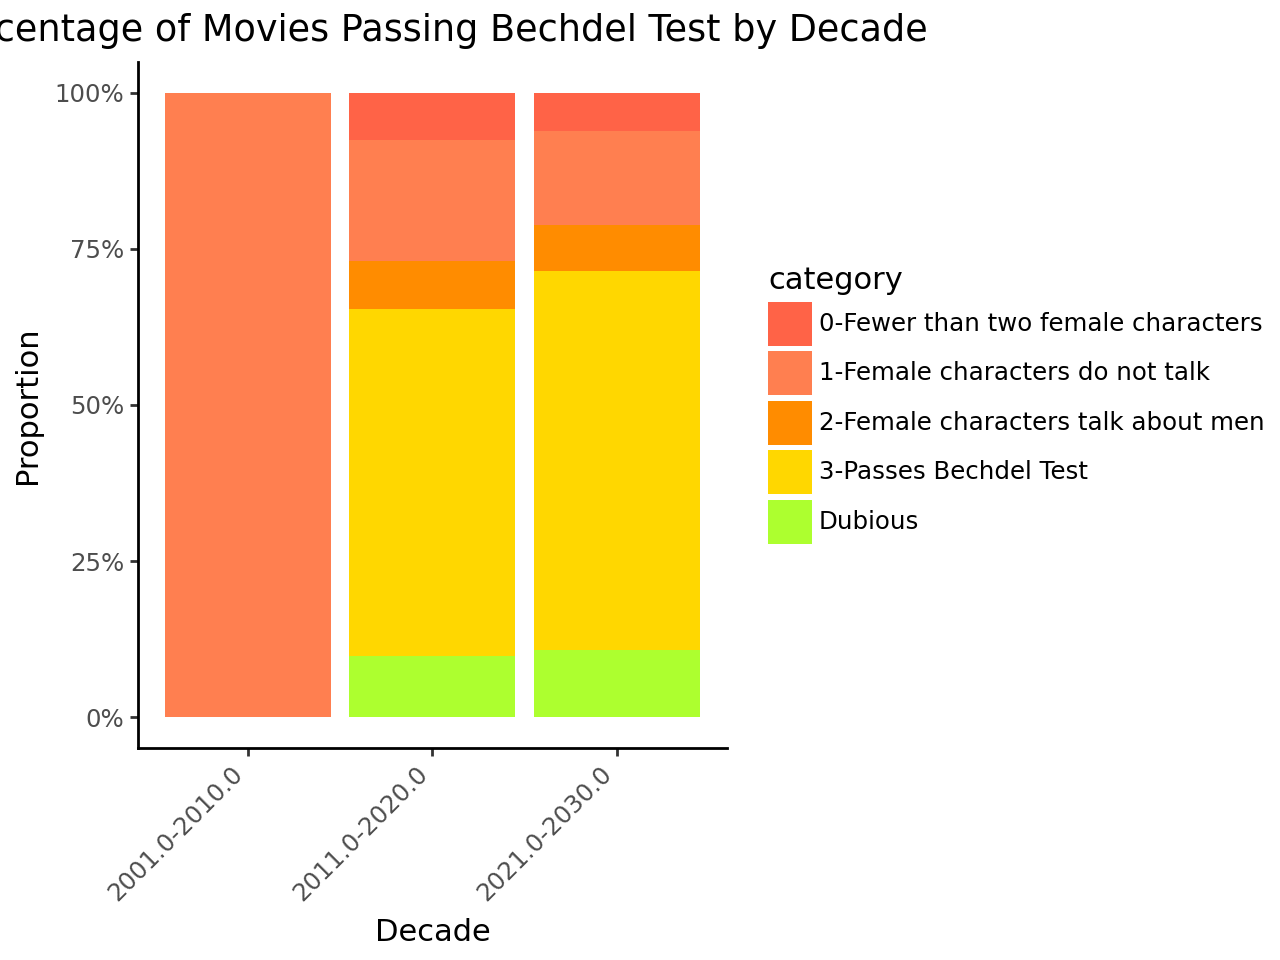

In [61]:
# Segment years into 10-year intervals
bechdel_detailed_df['year_interval'] = bechdel_detailed_df['year'].apply(lambda x: f"{x - x % 10 + 1}-{x - x % 10 + 10}")

# Stacked percentage bar chart by decade intervals using Plotnine
(ggplot(bechdel_detailed_df, aes(x='year_interval', fill='category')) + 
    geom_bar(position='fill') + 
    scale_y_continuous(labels=percent_format()) +
    scale_fill_manual(values=['#FF6347', '#FF7F50', '#FF8C00', '#FFD700', '#ADFF2F']) +
    labs(
        title='Percentage of Movies Passing Bechdel Test by Decade',
        x='Decade',
        y='Proportion'
    ) + 
    theme_classic() + 
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)


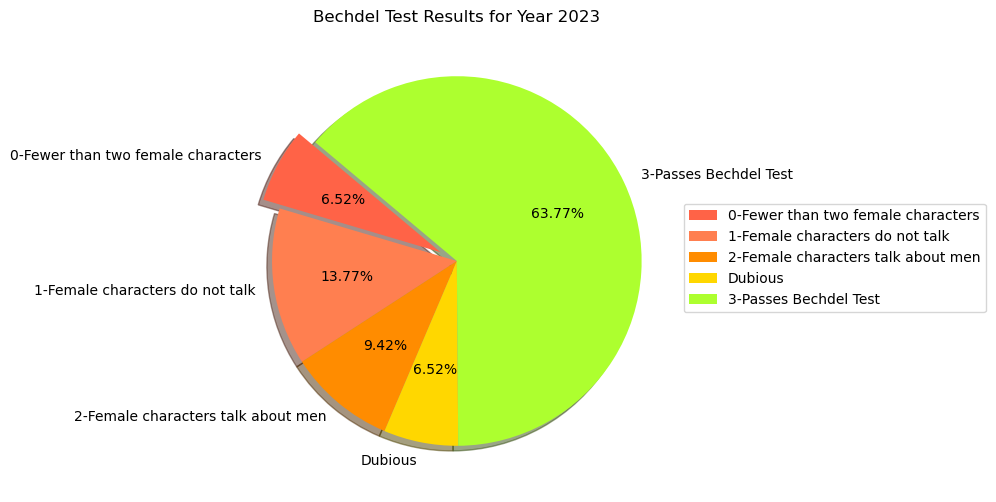

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for the pie chart
bechdel_pie = bechdel_detailed_df.groupby(['year', 'category']).size().unstack(fill_value=0).reset_index()
bechdel_pie['total'] = bechdel_pie[['0-Fewer than two female characters', '1-Female characters do not talk', '2-Female characters talk about men', 'Dubious', '3-Passes Bechdel Test']].sum(axis=1)
bechdel_pie = bechdel_pie.fillna(0)

# Choose the year you want to visualize
year_to_plot = 2023  # Replace with the desired year
data = bechdel_pie[bechdel_pie['year'] == year_to_plot][['0-Fewer than two female characters', '1-Female characters do not talk', '2-Female characters talk about men', 'Dubious', '3-Passes Bechdel Test']].values.flatten()

# Plot pie chart
colors = ['#FF6347', '#FF7F50', '#FF8C00', '#FFD700', '#ADFF2F']
labels = ["0-Fewer than two female characters", "1-Female characters do not talk", "2-Female characters talk about men", "Dubious", "3-Passes Bechdel Test"]
gap = [0.1, 0, 0, 0, 0]  # Add slight gap for better visualization

fig, ax = plt.subplots(figsize=(11, 6))
ax.pie(data, explode=gap, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
ax.legend(['0-Fewer than two female characters',
            '1-Female characters do not talk',
            '2-Female characters talk about men',
            'Dubious', 
            '3-Passes Bechdel Test'], 
            bbox_to_anchor=(1,0.5), 
            loc="center right", 
            fontsize=10, 
            bbox_transform=plt.gcf().transFigure
            )
ax.set_title(f'Bechdel Test Results for Year {year_to_plot}')
ax.margins(0.1, 0.1)  # Add margins for better spacing

plt.show()



In [71]:
# Filter data for years from 2010 onwards
bechdel_passing = bechdel_detailed_df[bechdel_detailed_df['bt_score'] > 0]
bechdel_passing = bechdel_passing.groupby('year')['category'].value_counts(normalize=True).unstack().fillna(0)
bechdel_passing['pass'] = bechdel_passing.get('3-Passes Bechdel Test', 0)
bechdel_passing = bechdel_passing.reset_index()

# Calculate mean percentage change
bechdel_passing['percentage_change'] = bechdel_passing['pass'].pct_change() * 100
bechdel_passing['percentage_change'].fillna(0, inplace=True)

# Plot mean percentage change over years using Plotnine
(ggplot(bechdel_passing, aes(x='year', y='percentage_change')) + 
    geom_line(color='teal', marker='o') + 
    labs(
        title='Mean Percentage Change in Passing Bechdel Test (2010 Onwards)',
        x='Year',
        y='Percentage Change'
    ) + 
    theme_minimal()
)


C:\Users\madhu\AppData\Local\Temp\ipykernel_2292\1940728916.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




PlotnineError: "Parameters {'marker'}, are not understood by either the geom, stat or layer."

In [75]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Calculate the mean percentage change in passing the Bechdel Test
bechdel_passing = bechdel_detailed_df.groupby('year')['passing'].mean().reset_index()
bechdel_passing['percentage_change'] = bechdel_passing['passing'].pct_change() * 100

# Fill NaN values resulting from pct_change calculation
bechdel_passing['percentage_change'] = bechdel_passing['percentage_change'].fillna(0)

# Plot mean percentage change over years using Plotnine
plot = (
    ggplot(bechdel_passing, aes(x='year', y='percentage_change')) + 
    geom_line(color='teal') +  # Line without markers
    geom_point(color='teal') +  # Points with markers
    labs(
        title='Mean Percentage Change in Passing Bechdel Test (2010 Onwards)',
        x='Year',
        y='Percentage Change'
    ) + 
    theme_minimal()
)

print(plot)


KeyError: 'Column not found: passing'

In [77]:
# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Display column names and the first few rows to understand the data structure
print(bechdel_detailed_df.columns)
print(bechdel_detailed_df.head())


Index(['title', 'year', 'rating', 'dubious', 'imdbid', 'id', 'submitterid',
       'date', 'visible'],
      dtype='object')
                      title    year  rating  dubious      imdbid       id  \
0    A Quiet Place: Day One  2024.0     1.0      0.0  13433802.0  11424.0   
1  Deadpool &amp; Wolverine  2024.0     1.0      0.0   6263850.0  11422.0   
2                  Twisters  2024.0     3.0      0.0  12584954.0  11418.0   
3                Ullozhukku  2024.0     3.0      0.0  32537777.0  11414.0   
4             Fall Guy, The  2024.0     3.0      0.0   1684562.0  11411.0   

   submitterid                 date  visible  
0      22109.0  2024-07-29 01:30:13      1.0  
1      22107.0  2024-07-27 05:16:38      1.0  
2      22099.0  2024-07-21 23:43:06      1.0  
3      22087.0  2024-07-17 02:38:55      1.0  
4      22082.0  2024-07-15 18:29:46      1.0  


In [79]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Check columns
print(bechdel_detailed_df.columns)

# Calculate the mean percentage change in passing the Bechdel Test
bechdel_passing = bechdel_detailed_df.groupby('year')['bechdel_pass'].mean().reset_index()
bechdel_passing['percentage_change'] = bechdel_passing['bechdel_pass'].pct_change() * 100

# Fill NaN values resulting from pct_change calculation
bechdel_passing['percentage_change'] = bechdel_passing['percentage_change'].fillna(0)

# Plot mean percentage change over years using Plotnine
plot = (
    ggplot(bechdel_passing, aes(x='year', y='percentage_change')) + 
    geom_line(color='teal') +  # Line without markers
    geom_point(color='teal') +  # Points with markers
    labs(
        title='Mean Percentage Change in Passing Bechdel Test (2010 Onwards)',
        x='Year',
        y='Percentage Change'
    ) + 
    theme_minimal()
)

print(plot)


Index(['title', 'year', 'rating', 'dubious', 'imdbid', 'id', 'submitterid',
       'date', 'visible'],
      dtype='object')


KeyError: 'Column not found: bechdel_pass'

In [81]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Check columns
print("Column names:", bechdel_detailed_df.columns)

# Calculate the mean percentage change in passing the Bechdel Test
bechdel_passing = bechdel_detailed_df.groupby('year')['passing_status'].mean().reset_index()
bechdel_passing['percentage_change'] = bechdel_passing['passing_status'].pct_change() * 100

# Fill NaN values resulting from pct_change calculation
bechdel_passing['percentage_change'] = bechdel_passing['percentage_change'].fillna(0)

# Plot mean percentage change over years using Plotnine
plot = (
    ggplot(bechdel_passing, aes(x='year', y='percentage_change')) + 
    geom_line(color='teal') +  # Line without markers
    geom_point(color='teal') +  # Points with markers
    labs(
        title='Mean Percentage Change in Passing Bechdel Test (2010 Onwards)',
        x='Year',
        y='Percentage Change'
    ) + 
    theme_minimal()
)

print(plot)


Column names: Index(['title', 'year', 'rating', 'dubious', 'imdbid', 'id', 'submitterid',
       'date', 'visible'],
      dtype='object')


KeyError: 'Column not found: passing_status'

In [83]:
import pandas as pd

# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Display column names and the first few rows
print("Column names:", bechdel_detailed_df.columns)
print("First few rows of the dataset:")
print(bechdel_detailed_df.head())


Column names: Index(['title', 'year', 'rating', 'dubious', 'imdbid', 'id', 'submitterid',
       'date', 'visible'],
      dtype='object')
First few rows of the dataset:
                      title    year  rating  dubious      imdbid       id  \
0    A Quiet Place: Day One  2024.0     1.0      0.0  13433802.0  11424.0   
1  Deadpool &amp; Wolverine  2024.0     1.0      0.0   6263850.0  11422.0   
2                  Twisters  2024.0     3.0      0.0  12584954.0  11418.0   
3                Ullozhukku  2024.0     3.0      0.0  32537777.0  11414.0   
4             Fall Guy, The  2024.0     3.0      0.0   1684562.0  11411.0   

   submitterid                 date  visible  
0      22109.0  2024-07-29 01:30:13      1.0  
1      22107.0  2024-07-27 05:16:38      1.0  
2      22099.0  2024-07-21 23:43:06      1.0  
3      22087.0  2024-07-17 02:38:55      1.0  
4      22082.0  2024-07-15 18:29:46      1.0  


In [85]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

# Load the dataset
bechdel_detailed_df = pd.read_csv('C:/Users/madhu/bechdel analysis/FInal_Bechdel_Detailed.csv', index_col=0)

# Check columns
print("Column names:", bechdel_detailed_df.columns)

# Calculate the mean percentage change in passing the Bechdel Test
bechdel_passing = bechdel_detailed_df.groupby('year')['passing_status'].mean().reset_index()
bechdel_passing['percentage_change'] = bechdel_passing['passing_status'].pct_change() * 100

# Fill NaN values resulting from pct_change calculation
bechdel_passing['percentage_change'] = bechdel_passing['percentage_change'].fillna(0)

# Plot mean percentage change over years using Plotnine
plot = (
    ggplot(bechdel_passing, aes(x='year', y='percentage_change')) + 
    geom_line(color='teal') +  # Line without markers
    geom_point(color='teal') +  # Points with markers
    labs(
        title='Mean Percentage Change in Passing Bechdel Test (2010 Onwards)',
        x='Year',
        y='Percentage Change'
    ) + 
    theme_minimal()
)

print(plot)


Column names: Index(['title', 'year', 'rating', 'dubious', 'imdbid', 'id', 'submitterid',
       'date', 'visible'],
      dtype='object')


KeyError: 'Column not found: passing_status'

In [87]:
bechdel_df_ordered.head()

NameError: name 'bechdel_df_ordered' is not defined